In [1]:

import os
import cv2
import numpy as np
import seaborn
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from Herramientas.modelLoader import cvModel

PATH_IMAGENES = 'C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/'
imagenes = os.listdir(PATH_IMAGENES)

print("Carpetas en imágenes: {}".format(imagenes))

labels = [4, 5, 0, 1, 2, 3] # Etiquetas.
PATHimagenes = [PATH_IMAGENES + i + '/' for i in imagenes] # Construyendo nuevos paths.
print("Primer PATH de las imágenes {}".format(PATHimagenes[0]))

Carpetas en imágenes: ['CT', 'Fondo', 'mder', 'mizq', 'MRI', 'Radiografia']
Primer PATH de las imágenes C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/CT/


In [6]:
# Obtenemos las dimensiones del modelo, leemos las imágenes, resize, no es necesario hacerlas byn.

def leerImagenes(PATH, dim, label):

    print(PATH, label)
    imagenes = os.listdir(PATH) # Imagenes en path

    return [[cv2.resize(cv2.imread(PATH + i), dimensiones), label] for i in imagenes]

PATH_modelo = 'C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Modelo/imMed.tflite'
modelo = cvModel(PATH_modelo, 0.1)

dimensiones = (modelo.getDims()[0], modelo.getDims()[1])

im = [leerImagenes(PATHimagenes[i], dimensiones, labels[i]) for i in range(0, len(PATHimagenes))] # Imagenes separadas.

C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/CT/ 4
C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/Fondo/ 5
C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/mder/ 0
C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/mizq/ 1
C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/MRI/ 2
C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Imagenes/Radiografia/ 3


In [7]:
total = im[0] # Contendrá imágenes y etiquetas.

for i in range(1, len(im)):

    total = np.concatenate((total, im[i]), axis = 0)

total = shuffle(total)
print(np.shape(total))

(600, 2)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Imagen: 31
Etiqueta: CT


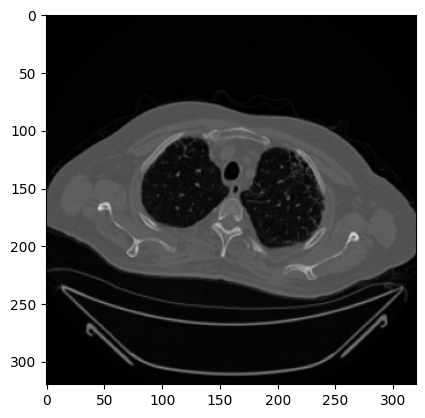

In [8]:
true_state = {0 : 'Mast. Der',
              1 : 'Mast. Izq',
              2 :'MRI',
              3 : 'Radiografia',
              4 :'CT',
              5 : 'Fondo'}

imagen = np.random.randint(0, 600) # Imagen random
print("Imagen: {}".format(imagen))
print("Etiqueta: {}".format(true_state[total[imagen][1]]))

plt.imshow(total[imagen][0])
plt.show()

In [16]:
# Instanciamos el modelo.

PATH_modelo = 'C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/R-CNN/Modelo/imMed.tflite'

detect = []

for i in np.arange(0.05, 1, 0.05):

    print("Evaluacion Modelo a umbral de {}".format(np.round(i, 2))) # Evaluamos el modelo con distintos umbrales.
    
    modelo = cvModel(PATH_modelo, i)
    conteo = 0

    for i in range(0, len(total)):
        
        u, b, c = modelo.findBoxes(total[i][0])
        
        if len(c) > 0:
                
            conteo+=1 # Imágenes que pudieron ser detectadas.

    detect.append(conteo)
    

Evaluacion Modelo a umbral de 0.05
Evaluacion Modelo a umbral de 0.1
Evaluacion Modelo a umbral de 0.15
Evaluacion Modelo a umbral de 0.2
Evaluacion Modelo a umbral de 0.25
Evaluacion Modelo a umbral de 0.3
Evaluacion Modelo a umbral de 0.35
Evaluacion Modelo a umbral de 0.4
Evaluacion Modelo a umbral de 0.45
Evaluacion Modelo a umbral de 0.5
Evaluacion Modelo a umbral de 0.55
Evaluacion Modelo a umbral de 0.6
Evaluacion Modelo a umbral de 0.65
Evaluacion Modelo a umbral de 0.7
Evaluacion Modelo a umbral de 0.75
Evaluacion Modelo a umbral de 0.8
Evaluacion Modelo a umbral de 0.85
Evaluacion Modelo a umbral de 0.9
Evaluacion Modelo a umbral de 0.95


[600, 600, 600, 600, 600, 600, 600, 600, 600, 600, 599, 598, 598, 596, 595, 591, 587, 577, 556]


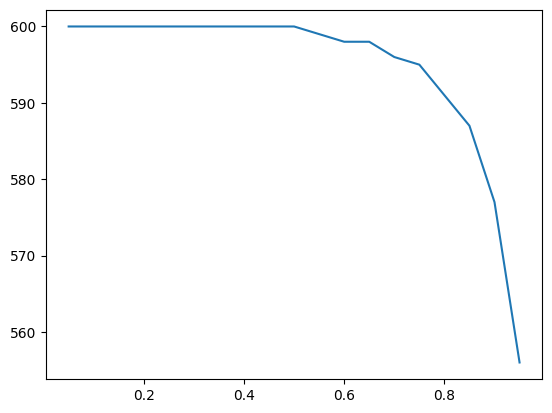

In [24]:
print(detect)
plt.plot(np.arange(0.05, 1, 0.05), detect)
plt.show()

In [ ]:
print(detect)

In [198]:
pred = []

for i in range(0, len(total)): # Recorremos todas las imágenes.

    u, b, c = modelo.findBoxes(total[i][0]) # Umbral (certeza), cajas, clases
    pred.append(c[0])

In [208]:
true = [total[i][1] for i in range(0, len(total))]

<Axes: >

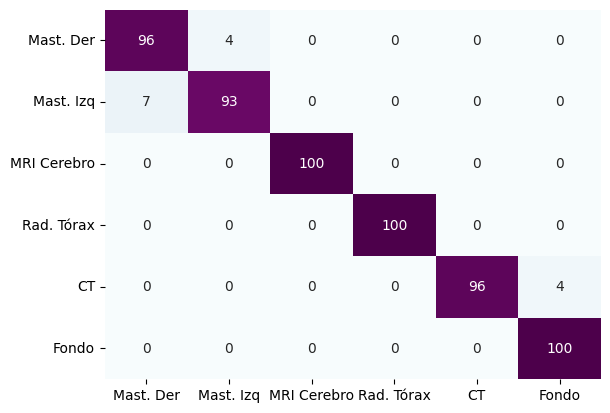

In [212]:
cm = confusion_matrix(true, pred)
etiquetas = ['Mast. Der', 'Mast. Izq', 'MRI Cerebro', 'Rad. Tórax', 'CT', 'Fondo']

seaborn.heatmap(cm,  xticklabels = etiquetas, yticklabels = etiquetas, annot = True, cbar = False, fmt = 'g', cmap = 'BuPu')

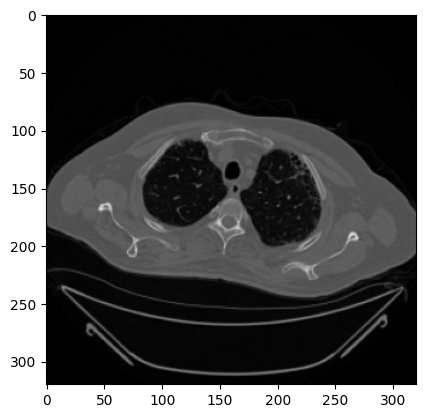

In [199]:
plt.imshow(total[19][0])
plt.show()

In [200]:
u, b, c = modelo.findBoxes(total[imagen][0])
print(u, b, c[0])

[0.99562067] [array([0.00304568, 0.00220677, 0.99981046, 0.99982476], dtype=float32)] 3.0


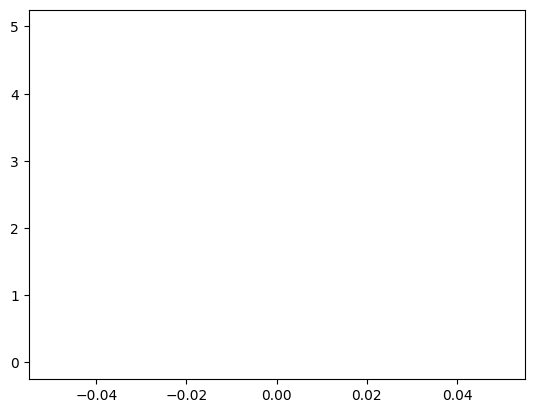

In [201]:
plt.plot([pred])
plt.show()